# K-Means

### Use the given dataset and implement K-Means from scratch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [3]:
class K_Means:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, data):
        indices = np.random.choice(len(data), self.k, replace=False)
        return data.iloc[indices]

    def assign_clusters(self, data, centroids):
        distances = np.linalg.norm(data.values - centroids.values[:, np.newaxis], axis=2)
        return np.argmin(distances, axis=0)

    def update_centroids(self, data, clusters):
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(self.k)])
        return pd.DataFrame(new_centroids, columns=data.columns)

    def fit(self, data):
        self.centroids = self.initialize_centroids(data.drop(columns=['CustomerID']))

        for _ in range(self.max_iters):
            clusters = self.assign_clusters(data.drop(columns=['CustomerID']), self.centroids)
            new_centroids = self.update_centroids(data.drop(columns=['CustomerID']), clusters)

            # Check for convergence
            if np.array_equal(self.centroids.values, new_centroids.values):
                break

            self.centroids = new_centroids

        return clusters

    def plot_clusters(self, data):
        plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c='blue', label='Data Points')
        plt.scatter(self.centroids['Annual Income (k$)'], self.centroids['Spending Score (1-100)'],
                    c='red', marker='X', s=200, label='Centroids')
        plt.xlabel('Annual Income (k$)')
        plt.ylabel('Spending Score (1-100)')
        plt.title('K-Means Clustering')
        plt.legend()
        plt.show()

In [4]:
model1 = K_Means(k=3)
clusters = model1.fit(data)

data['Cluster'] = clusters
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0


Final Centroids:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  0.406250  46.90625           31.625000               27.312500
1  0.550000  39.92500           89.225000               21.625000
2  0.414062  36.50000           58.835938               64.851562


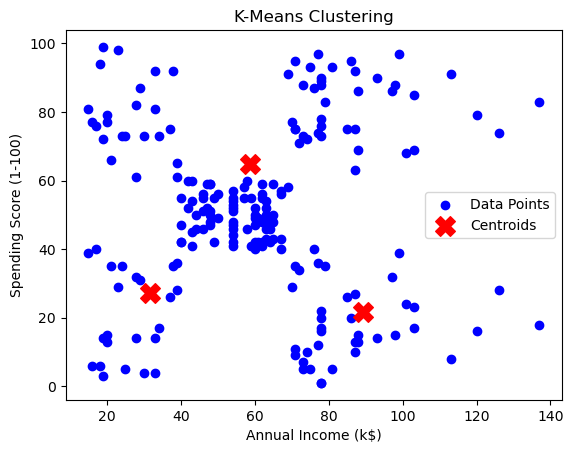

In [5]:
print("Final Centroids:")
print(model1.centroids)

model1.plot_clusters(data)

### Use the sklearn K-Means implementation. 

In [6]:
from sklearn.cluster import KMeans

# Extract features for clustering
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize and fit the KMeans model
model2 = KMeans(n_clusters = 3, random_state = 42)
data['Cluster'] = model2.fit_predict(features)
clus = data['Cluster'].values

# Print the final centroids and the DataFrame with assigned clusters
print("Final Centroids:")
print(model2.cluster_centers_)

Final Centroids:
[[ 0.52631579 40.39473684 87.         18.63157895]
 [ 0.40650407 40.32520325 44.15447154 49.82926829]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]]


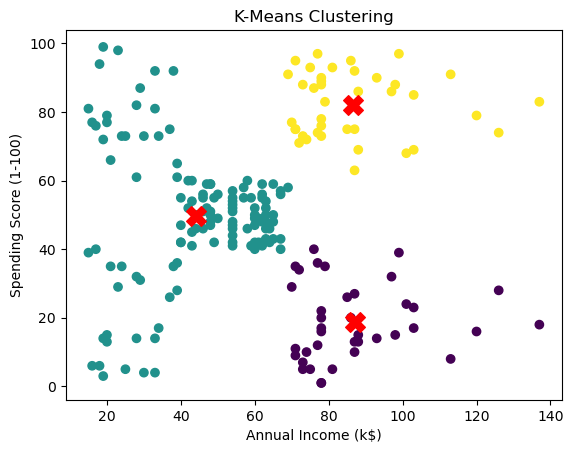

In [8]:
# Visualize the clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = data['Cluster'], cmap = 'viridis')
plt.scatter(model2.cluster_centers_[:, 2], model2.cluster_centers_[:, 3], marker='X', s=200, c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

### Compare the results of both the implementations and write your inferences.

In [9]:
print("Clusters of kmeans - scratch\n",clusters)
print("Clusters of kmeans - sklearn\n", clus)

Clusters of kmeans - scratch
 [0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 2 2 0 0 2 2 2 2 0 0 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1]
Clusters of kmeans - sklearn
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [10]:
print("Final Centroids kmeans - scratch:")
print(model1.centroids)
print("\nFinal Centroids kmeans - sklearn:")
print(model2.cluster_centers_)

Final Centroids kmeans - scratch:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  0.406250  46.90625           31.625000               27.312500
1  0.550000  39.92500           89.225000               21.625000
2  0.414062  36.50000           58.835938               64.851562

Final Centroids kmeans - sklearn:
[[ 0.52631579 40.39473684 87.         18.63157895]
 [ 0.40650407 40.32520325 44.15447154 49.82926829]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]]


### Inference
This suggests that both implementations are performing reasonably well in terms of cluster separation for given dataset. The clusters formed exhibit similar structures and centroids, indicating consistency between the custom implementation and sklearn's implementation. While both algorithms yield similar results, sklearn's KMeans is likely to be more efficient and scalable, due to its optimized implementation.